<h1>
Previsão de intensão de compra de Usuários de E-Commerce.
</h1>

## Problema de negócio.

    - Obter uma classificação de intensão de compra de clientes que utilizam o e-commerce, para que a equipe de marketing possa fazer campanhas direcionadas de produtos para esses clientes que estão propensos a comprar ao entrar no site.

 
## Base de dados

    Link para acesso do banco de dados: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset


##### Você está aqui pelo processo completo e as linhas de código?
    Siga em frente em cada etapa e caso se sinta a vontade me ajude a desenvolver ainda mais a minha visão sobre analise exploratória de dados.

##### Você está aqui pelo resultado final?
    Vá direto ao final conclusão final para entender o resultado final do tratamento e a exploração dos dados.
    
    
  
<h2>
         1. Instalação e importação das bibliotecas;
</h2>
   
    
    1.1 Documentação do pacote de dados Pandas link: https://pandas.pydata.org/docs/

    1.2 Documentação do pacote de dados Seaborn link:https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp

    1.3 Documentação do pacote de dados scikit-learn link:https://scikit-learn.org/0.21/documentation.html

    1.4 Documentação do pacote de dados Numpy link: https://numpy.org/doc/

    1.5 Documentação do pacote de dados Matplotlib link: https://matplotlib.org/stable/index.html
   
   
   

<h2>
        2. Importação dos dados;
</h2>




<h2>
        3. Exploração do Dataset; 
</h2>
   
    3.1 Visualização das primeiras e ultimas linhas da tabela;
    
    3.2 Visualizando o tamanho total do dataset;
    
    3.3 Visualizando o nome de cada uma das colunas;
    
    3.4 Verificando a indexação das linhas;
    
    3.5 Analise de valores únicos dentro das colunas;
    
        3.5.1 Visualizando os valores que são únicos;
    
    3.6 Analisando o formato de cada coluna;

    3.7 Identificando valores missing;
    
    3.8 Visualizar linhas duplicadas;
    
        3.8.1 Visualizando as linhas duplicadas;    
   
<h2>
     4. Limpeza dos dados;
</h2>
     
      4.1 Tratamento das linhas duplicadas;
      
      4.2 Tratamento dos dados nulos;
      
      4.3 Separar dados categoricos e dados numéricos;
      
<h2>
     5. Análise exploratória dos dados;
</h2>

      5.1 Análises e insights importantes;
      
      5.2 Correlações entre os dados;

<h2>
     6. Transformação e pré-processamento dos dados;
</h2>


      6.1 Transformando as variáveis categóricas;
      
      6.2 Balanceamento dos dados;



<h2>
     7. Criação dos modelos preditivos de classificação e avaliação do resultado;
</h2>


      7.1 Separação dos dados de treino e teste;
      
      7.2 Criação dos modelos e treino;
      
      7.3 Avaliação do resultado;
      
      7.4 Criando uma nova maquina preditiva com a otimização de hiperparâmetros;
      
          7.4.1 Valores utilizados no grid do hiperparâmetro;
          
      7.5 Criando a segunda maquina preditiva e avaliando;
      
      7.6 Comparativo final entre os dois modelos criados; 
      

<h2>
     8. Conclusões finais;
</h2>


___
    

<h2>
         1. Instalação e importação das bibliotecas;
</h2>

In [1]:
!pip install -q -U watermark
!pip install -q imblearn

import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import matplotlib
import imblearn
from sklearn.model_selection import train_test_split
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score,roc_auc_score
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
from IPython.display import display
style = {'description_width': 'initial'}


import warnings
warnings.filterwarnings('ignore')

- Para entender as versões de cada biblioteca podemos utilizar o reload_ext

In [2]:
%reload_ext watermark
%watermark -a "Fausto A. Lemos" --iversions

Author: Fausto A. Lemos

numpy     : 1.21.5
imblearn  : 0.0
sklearn   : 1.0.2
seaborn   : 0.11.2
pandas    : 1.4.4
matplotlib: 3.5.2



<h2>
        2. Importação dos dados;
</h2>

In [3]:
data=pd.read_csv('online_shoppers_intention.csv')

<h2>
        3. Exploração do Dataset; 
</h2>

<h4>
   3.1 Visualização das primeiras e ultimas linhas da tabela; 
</h4>    

In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


<h4>
   3.2 Visualizando o tamanho total do dataset; 
</h4>    

In [6]:
data.shape

(12330, 18)

<h4>
   3.3 Visualizando o nome de cada uma das colunas;
</h4>    

In [7]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

- Podemos utilizar para caso necessário quisermos pegar o nome de cada coluna para tratamento já no formato correto.

<h4>
   3.4 Verificando a indexação das linhas;
</h4> 

In [8]:
data.index

RangeIndex(start=0, stop=12330, step=1)

- Somente para visualizar e verificar a indexação de cada linha, como serão identificadas.

<h4>
    3.5 Analise de valores únicos dentro das colunas;
</h4>     

In [9]:
data.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

- Para fins de visualização, dividiremos os dados em variáveis contínuas e categóricas. Trataremos todas as variáveis com menos de 30 entradas únicas como categóricas, isso não é um padrão mas seria uma forma de entender e separar de forma prática.

<h4>
        3.6 Analisando o formato de cada coluna;
</h4> 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- Perceptível que temos linhas com valores nulos 14 linhas que podemos tratar posteriormente na fase de limpeza dos dados. Além disso as colunas month e visitor type se tratam de formatos string e o as ultimas duas colunas são dados boleanos que também deverão ser tratados posteriormente.

<h4>
   3.7 Identificando valores missing;
</h4>  

In [11]:
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

- Somente como confirmação as 14 linhas com valores nulos.

<h4>
   3.8 Visualizar linhas duplicadas;
</h4>  

In [12]:
data.duplicated().sum()

119

- Nesse caso temos 119 linhas duplicadas e precisamos gerar uma ação a partir disso para evitar que o resultado fique enviesado, por se tratar de uma base de dados grande será possível excluir somente.

<h4>
   3.8.1 Visualizando as linhas duplicadas;
</h4>  

In [13]:
data[data.duplicated(keep=False)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
158,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
286,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


 - As linhas são identicas precisamos tratar mas faremos isso posteriormente na fase de limpesa dos dados também.

<h2>
     4. Limpeza dos dados;
</h2>

<h4>
   4.1 Tratamento das linhas duplicadas;
</h4>  

In [14]:
data.drop_duplicates(keep='first', inplace=True)

In [15]:
data[data.duplicated(keep=False)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


- Efetuamos o tratamento das linhas duplicadas, aonde vamos manter apenas as primeiras linhas de cada repetição pois são todas idênticas.

<h4>
   4.2 Tratamento dos dados nulos;
</h4>  

In [16]:
data.dropna(inplace = True)

In [17]:
print(data.isna().sum())
data.shape

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


(12199, 18)

- Tratamento efetuado, agora não temos mais valores nulos no dataset, ficamos com o total de 12.199 linhas.

<h4>
   4.2 Separar dados categoricos e dados numéricos;
</h4>  

In [18]:
data_copy = data.copy()

continuous = []
categorical = []

for c in data.columns[:-1]:
    if data.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [19]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [20]:
data[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [21]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [22]:
data[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


- Criamos uma cópia do data frame original, pois também serparamos as variáveis continuas e as variáveis categoricas, para que podemos analisar e trabalhar em cada um deles.

<h2>
     5. Análise exploratória dos dados;
</h2>

<h4>
5.1 Análises e insights importantes;
</h4>

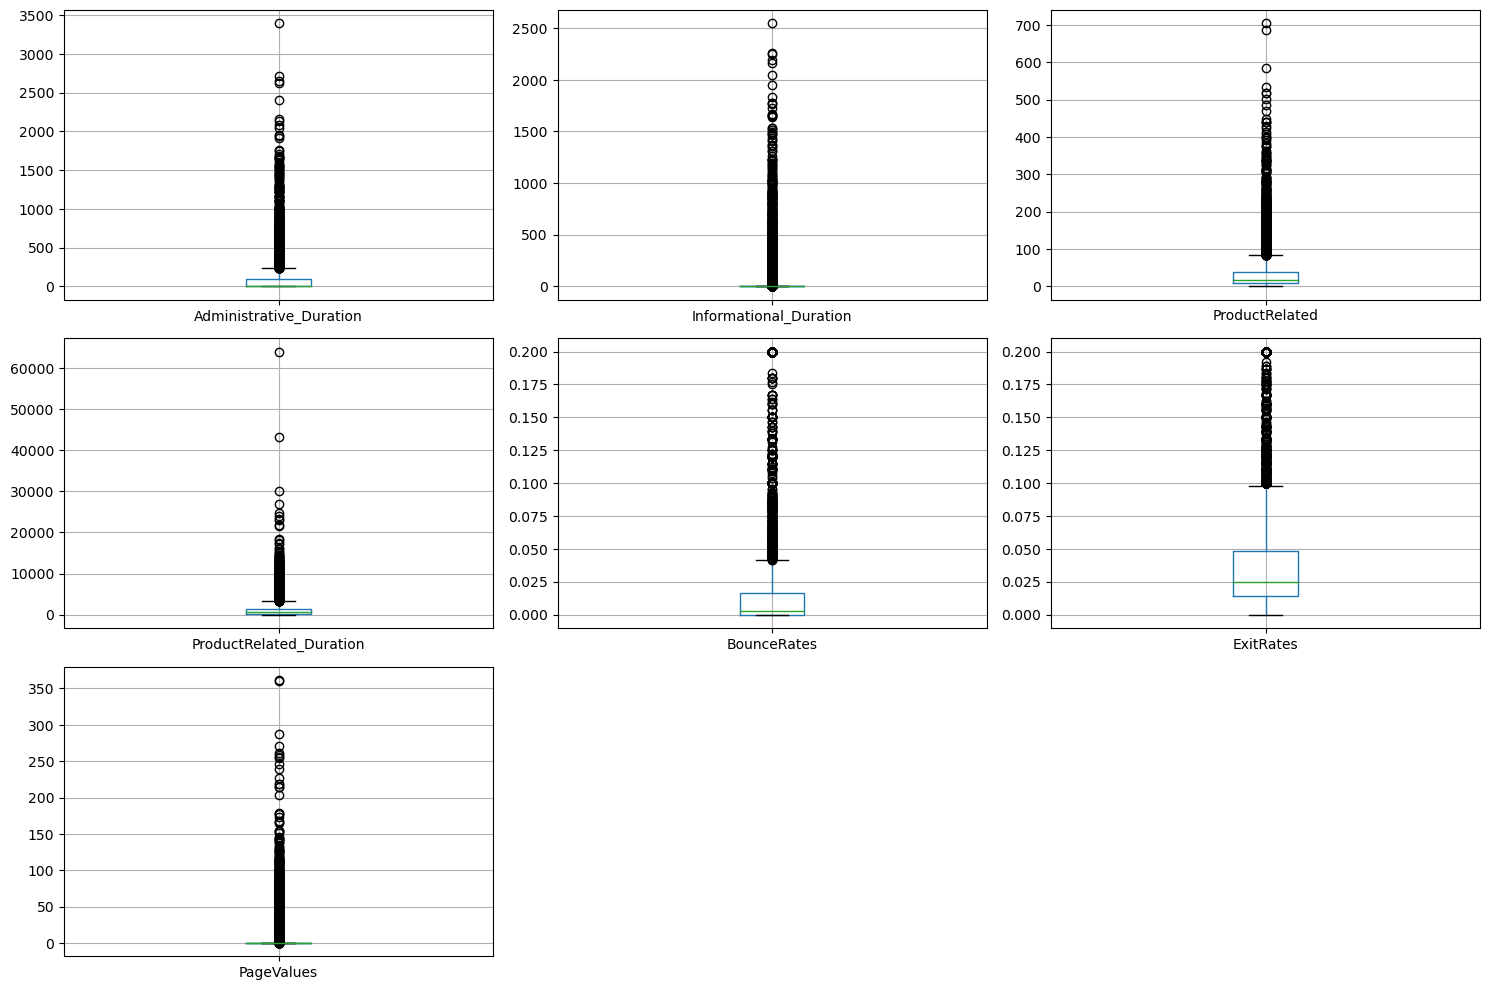

In [23]:
fig = plt.figure(figsize = (15,10))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    data.boxplot(col);
    plt.tight_layout()
    
plt.savefig('boxplot1.png')
#plt.title('OUTLIERS', fontsize=15, fontweight='bold')

- Será necessário tratar todas essas outliers para que o algoritmo tenha um melhor desempenho.

<h4>
5.2 Correlações entre os dados;
</h4>

Text(0.5, 1.0, 'Matriz de Correlação')

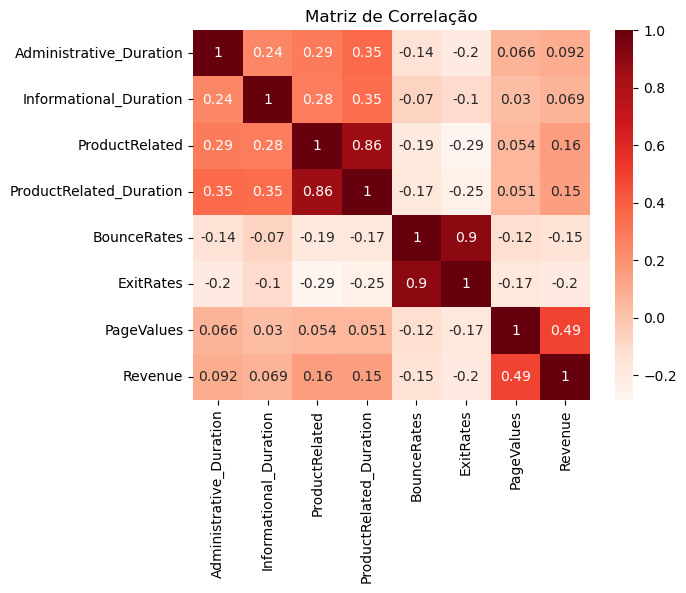

In [24]:
sns.heatmap(data[['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues', 'Revenue']].corr(), cmap='Reds', annot= True)
plt.title('Matriz de Correlação')

- Existe uma correlação muito forte entre o BounceRates e o ExitRates, além do Pagevalues e Revenue, provável que teremos que tratar essa correlação.

<AxesSubplot:title={'center':'Venda ou Não'}, xlabel='Revenue', ylabel='count'>

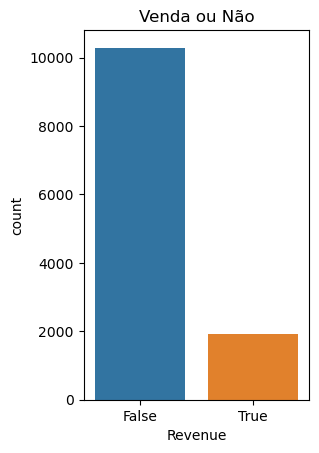

In [25]:
plt.subplot(1,2,2)
plt.title("Venda ou Não")
sns.countplot(data['Revenue'])

- Observamos também que o volume de visitas que não efetua a compra também é muito alto e relação ao volume de pessoas que compram, isso pode afetar muito a qualidade do resultado portanto teremos que fazer um balanceamento.

Text(0.5, 1.0, 'Tipos de Visitas')

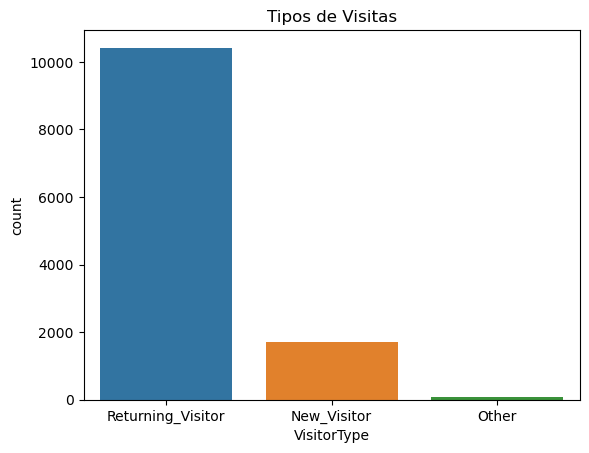

In [26]:
plt.xlabel("Tipo de Visitante")
sns.countplot(data['VisitorType'])
plt.title("Tipos de Visitas")


- Temos um volume bem grande também de clientes que retornam ao site. 

<AxesSubplot:xlabel='VisitorType'>

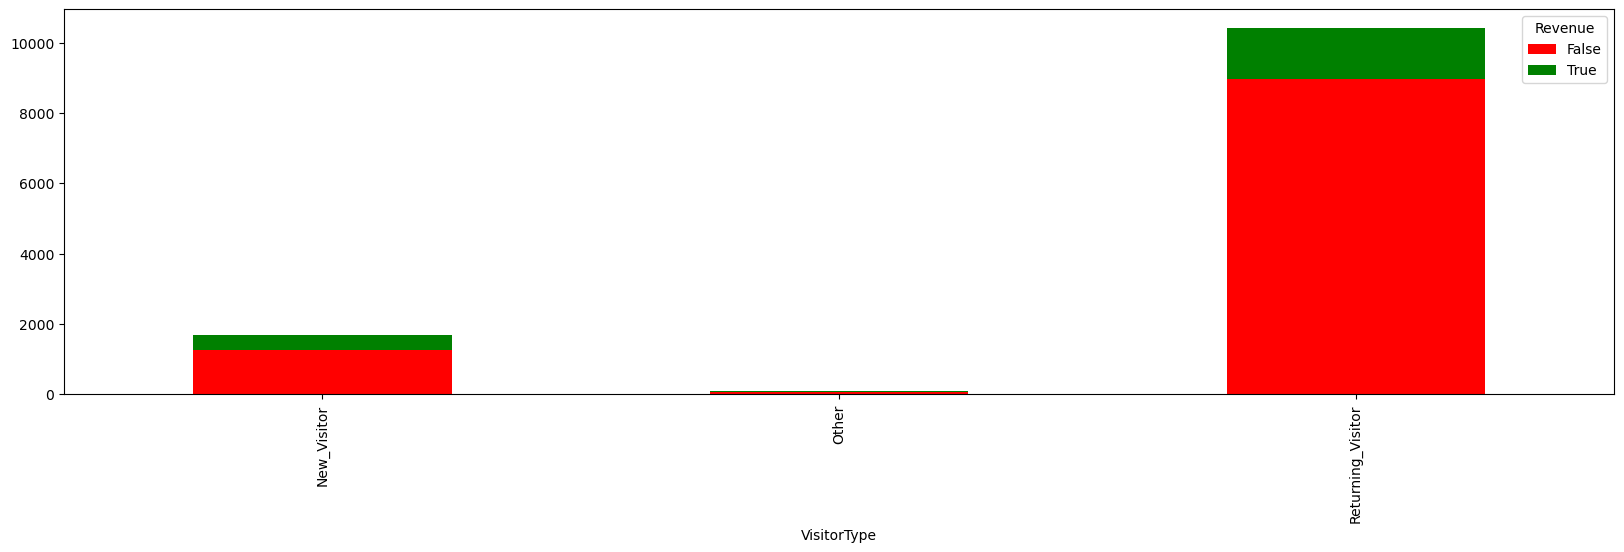

In [27]:
pd.crosstab(data['VisitorType'], data['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (20, 5), 
                                                   color = ['red', 'green'])

- Os visitantes que mais geram receitas são os visitantes que estão retornando ao site, assim já podemos ter um visão em qual foco podemos seguir para fazer campanhas direcionadas.

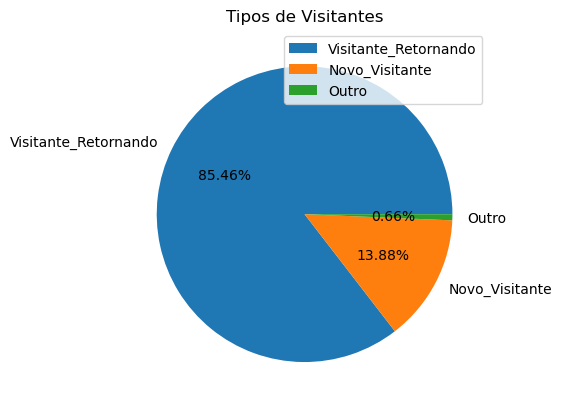

In [28]:
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(data['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()

<AxesSubplot:title={'center':'Final de Semana ou Não'}, xlabel='Weekend', ylabel='count'>

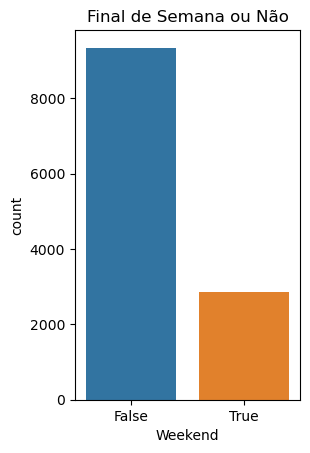

In [29]:
plt.subplot(1,2,1)
plt.title("Final de Semana ou Não")
sns.countplot(data['Weekend'])

Text(0.5, 1.0, 'Final de semana x Receita')

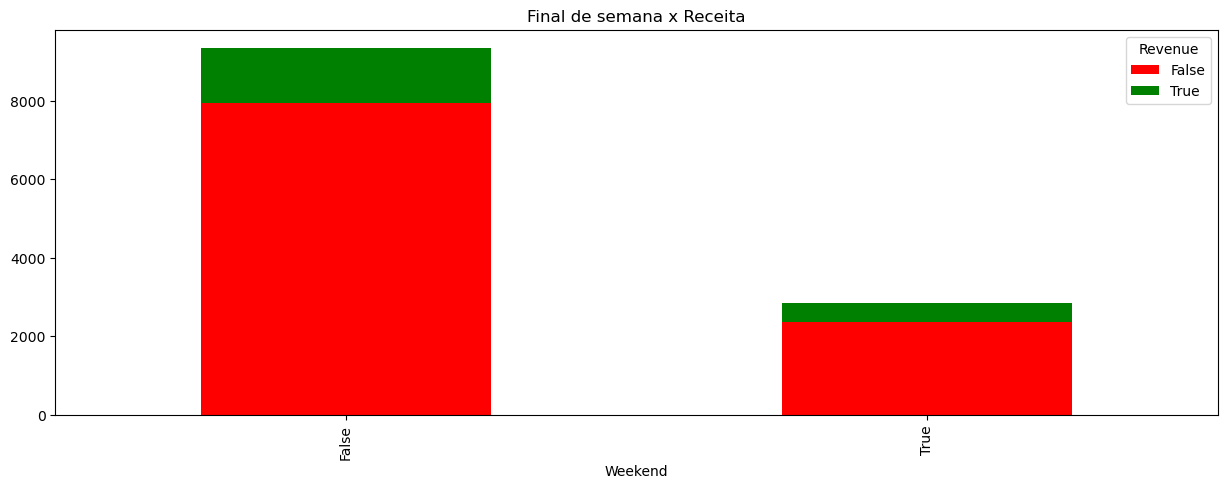

In [30]:
pd.crosstab(data['Weekend'], data['Revenue']).plot(kind = 'bar', 
                                               stacked = True, 
                                               figsize = (15, 5), 
                                               color = ['red', 'green'])
plt.title("Final de semana x Receita")

- O maior volume de receitas não são gerados no final de semana.

<AxesSubplot:title={'center':'Tipos de Sistemas Operacionais'}, xlabel='OperatingSystems', ylabel='count'>

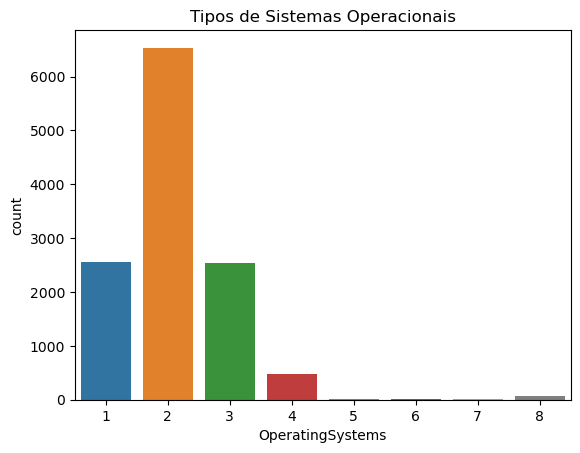

In [31]:
plt.title("Tipos de Sistemas Operacionais")
plt.xlabel("Sistema Operacional Usado")
sns.countplot(data['OperatingSystems'])

<AxesSubplot:xlabel='OperatingSystems'>

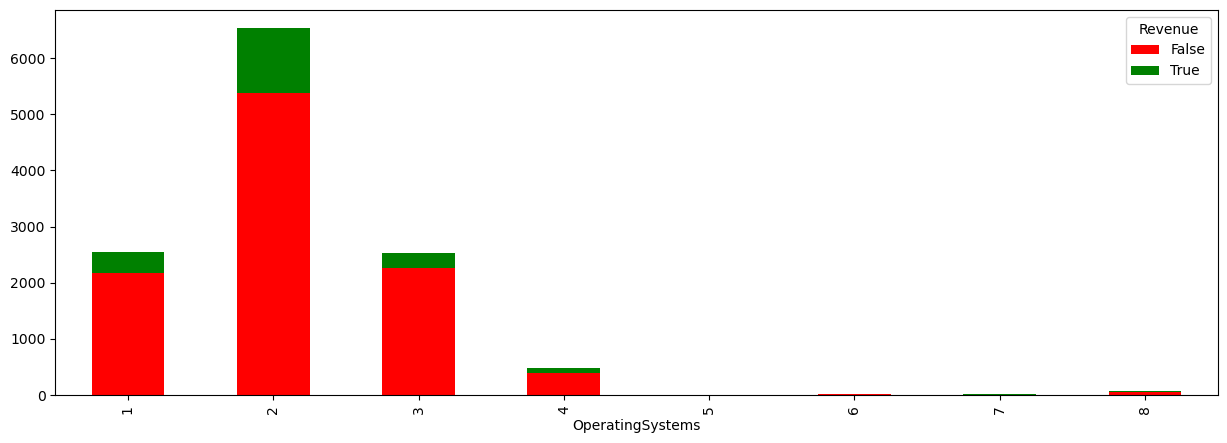

In [32]:
pd.crosstab(data['OperatingSystems'], data['Revenue']).plot(kind = 'bar', 
                                                        stacked = True, 
                                                        figsize = (15, 5), 
                                                        color = ['red', 'green'])

<AxesSubplot:title={'center':'Tipos de Tráfego'}, xlabel='TrafficType', ylabel='count'>

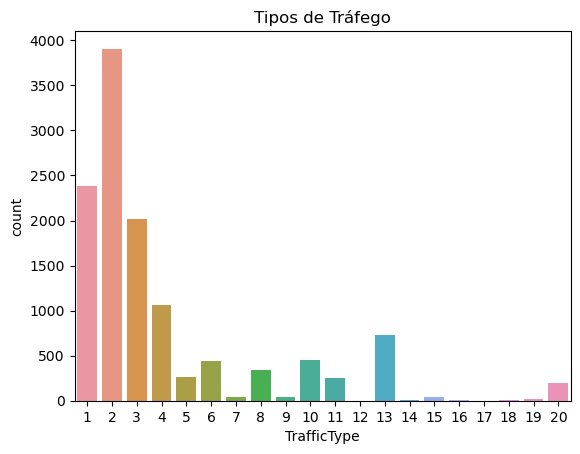

In [33]:
plt.title("Tipos de Tráfego")
plt.xlabel("Tipo de Tráfego")
sns.countplot(data['TrafficType'])

<AxesSubplot:xlabel='TrafficType'>

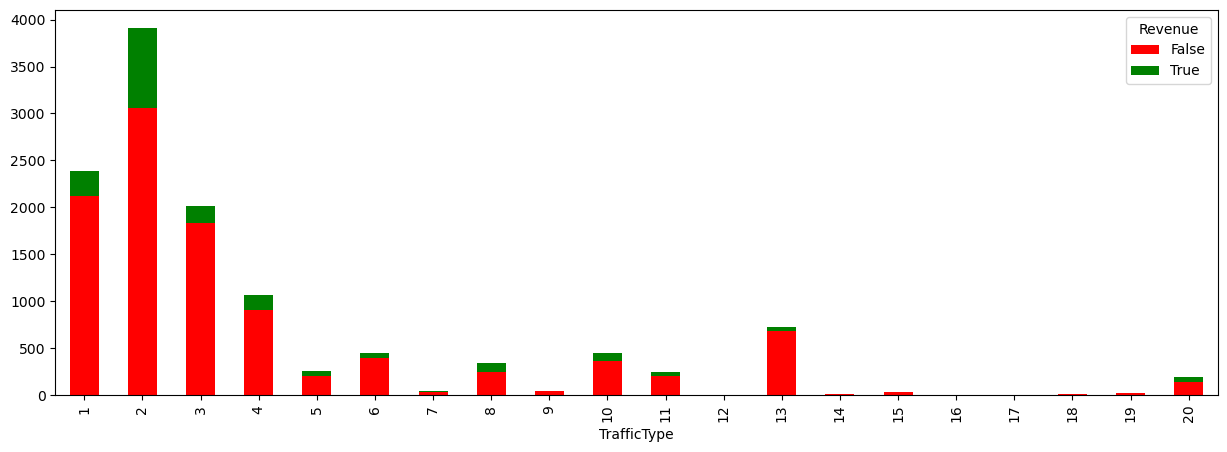

In [34]:
pd.crosstab(data['TrafficType'], data['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])

<h2>
     6. Transformação e pré-processamento dos dados;
</h2>

<h4>
   6.1 Transformando as variáveis categoricas;
</h4>  

In [35]:
data_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [36]:
lb = LabelEncoder()

data_copy['Month'] = lb.fit_transform(data_copy['Month'])
data_copy['VisitorType'] = lb.fit_transform(data_copy['VisitorType'])

In [37]:
data_copy.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,2.0,33.000000,0.000000,0.100000,0.0,0.2,2,1,1,1,3,2,False,False
96,0.0,0.0,0.0,0.0,6.0,1566.500000,0.050000,0.066667,0.0,0.2,2,1,1,1,3,2,False,False
97,0.0,0.0,0.0,0.0,4.0,105.000000,0.000000,0.025000,0.0,0.6,2,1,1,1,4,2,False,False
98,0.0,0.0,1.0,0.0,7.0,50.000000,0.038095,0.080952,0.0,0.6,2,2,4,1,7,2,False,False


In [38]:
data_copy.shape

(12199, 18)

<h4>
   6.2 Balanceamento dos dados;
</h4>  

- Como citado anteriormente por existir um volume muito grande de visitantes que não compram no site e o volume dos visitantes que compram ser menor devemos balancear as classes (Oversampling), teremos que aumentar um pouco do data frame para balancear e manter as variáveis do mesmo tamanho.

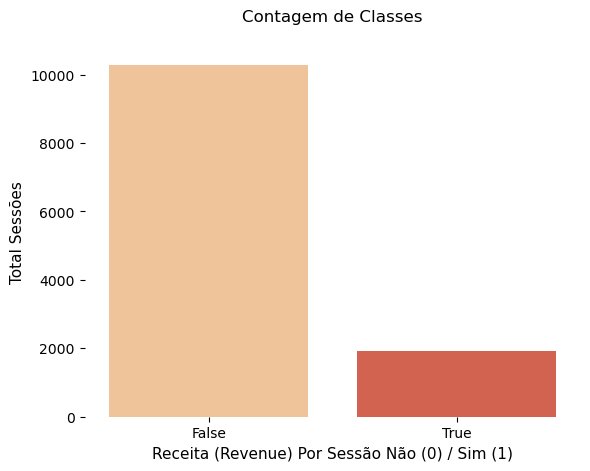

In [39]:
sns.countplot(data_copy.Revenue, palette = "OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

 - Ao lidar com conjuntos de dados desbalanceados, o oversampling envolve a replicação ou geração sintética de instâncias da classe minoritária. Em outras palavras, se temos menos exemplos de uma determinada categoria, o oversampling cria cópias desses exemplos existentes ou utiliza técnicas para gerar novos exemplos semelhantes. Dessa forma, garantimos que o modelo tenha uma quantidade equilibrada de dados para aprender com eficiência, evitando que seja tendencioso em relação à classe majoritária. Essa abordagem promove uma melhor generalização do modelo para situações do mundo real.

In [40]:
X = data_copy.iloc[:,0:17]
Y = data_copy.iloc[:,17]

 - Primeiro separamos as variáveis X e Y.

In [41]:
seed = 7
smote_bal = SMOTE(random_state = seed)

- Criando o balanceador com o SMOTE.

In [42]:
X_res, Y_res = smote_bal.fit_resample(X, Y)

- Por ultimo vamos aplicar o resample com fit.

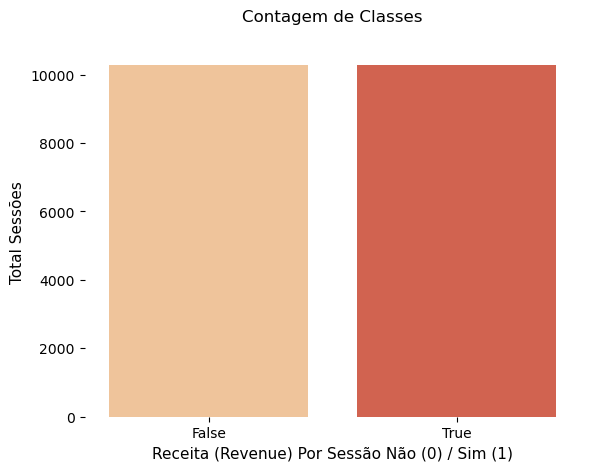

In [43]:
sns.countplot(Y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

- Dessa forma rebalanceamos as classes e no momento da contrução e avaliação da maquina preditiva teremos um ótimo resultado.

In [44]:
X = X_res
Y = Y_res
# Ajustando as variáveis novamente.

<h2>
     7. Criação dos modelos preditivos de classificação e avaliação do resultado;
</h2>

<h4>
7.1 Separação de dados de treino e teste;
</h4>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

<h4>
7.2 Criação dos modelos e treino;
</h4>

In [46]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

- Para impedir que as informações sobre a distribuição do conjunto de teste vazem em seu modelo, o ideal é aplicar a padronização em separado nos dados de treino e de teste, ajustando o redimensionador apenas aos dados de treinamento, padronizando então os conjuntos de treinamento e teste com esse redimensionador (exatamente como está na célula acima). Ao ajustar o redimensionador no conjunto de dados completo antes da divisão em treino e teste, informações sobre o conjunto de testes são usadas para transformar o conjunto de treinamento.

- Conhecer a distribuição de todo o conjunto de dados pode influenciar como você detecta e processa outliers, bem como como você parametriza seu modelo. Embora os dados em si não sejam expostos, há informações sobre a distribuição dos dados. Como resultado, o desempenho do seu conjunto de testes não é uma estimativa real do desempenho em dados invisíveis.

- Sempre aplique a padronização depois de fazer a divisão em treino e teste, exatamente como fizemos aqui. Usamos fit_transform() nos dados de treino e transform() nos dados de teste quando usamos o StandardScaler().

In [47]:
model_v1 = svm.SVC(kernel = 'linear')

- Iremos utilizar o SVC Support vector classifier pois iremos classificar o resultado, caso fosse uma regressão iriamos utilizar o SVR. E iremos utilizar o Kernel linear.

In [49]:
start = time.time()
model_v1.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de Treinamento do Modelo foi de :', end - start)

Tempo de Treinamento do Modelo foi de : 4.370744466781616


In [50]:
predict_v1 = model_v1.predict(X_test_scaled)

<h4>
7.3 Avaliação do resultado;
</h4>

In [52]:
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(predict_v1, y_test),
               'Recall':recall_score(predict_v1, y_test),
               'F1 Score':f1_score(predict_v1, y_test),
               'Acurácia':accuracy_score(predict_v1, y_test),
               'AUC':roc_auc_score(y_test, predict_v1)}

In [53]:
print("Métricas em Teste:\n")
SVM_dict_v1

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.7973793544263343,
 'Recall': 0.8872688477951636,
 'F1 Score': 0.8399259383942097,
 'Acurácia': 0.845991902834008,
 'AUC': 0.8466542208769886}

<h4>
7.4 Criando uma nova maquina preditiva com a otimização de hiperparâmetros;
</h4>

In [54]:
model_v2 = svm.SVC(kernel = 'rbf')

<h4>
    7.4.1 Valores utilizados no grid do hiperparâmetro;
</h4>

In [55]:
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

- Iremos utilizar o Grid Search para incluir uma lista de parâmetros e na avaliação iremos entender qual retornou a melhor acurácia durante o treino, além disso quais valores utilizar podemos buscar direto na documentação do scikit learn para os modelos svm.

In [56]:
svm_param_grid = dict(gamma = gamma_range, C = C_range)

<h4>
7.5 Criando a segunda maquina preditiva e avaliando;
</h4>

In [57]:
start = time.time()
model_v2_grid_search_rbf = GridSearchCV(model_v2, svm_param_grid, cv = 3)

In [58]:
model_v2_grid_search_rbf.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

Tempo de Treinamento do Modelo com Grid Search: 73.94954562187195


In [59]:
print(f"Acurácia em Treinamento: {model_v2_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {model_v2_grid_search_rbf.best_params_}")

Acurácia em Treinamento: 87.05%

Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.003}


- Podemos já visualizar a acurácia do modelo e os melhores parâmetros testados e assim incluir novos hiperparâmetros para tentar melhorar ainda mais a acurácia final.

In [60]:
predict_v2 = model_v2_grid_search_rbf.predict(X_test_scaled)

In [62]:
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'RBF com Tunning de Hyperparâmetros',
               'Precision':precision_score(predict_v2, y_test),
               'Recall':recall_score(predict_v2, y_test),
               'F1 Score':f1_score(predict_v2, y_test),
               'Acurácia':accuracy_score(predict_v2, y_test),
               'AUC':roc_auc_score(y_test, predict_v2)}

- Criação de um novo dicionário com os resultados finais para comparar com o modelo 1.

In [63]:
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'RBF com Tunning de Hyperparâmetros',
 'Precision': 0.8558644934483861,
 'Recall': 0.8932621747831888,
 'F1 Score': 0.8741635384364289,
 'Acurácia': 0.8751417004048583,
 'AUC': 0.8754043412744228}

<h4>
7.6 Comparativo final entre os dois modelos criados;
</h4>

In [64]:
resumo = pd.DataFrame({'Baseline':pd.Series(SVM_dict_v1),
                       'Máquina_Preditiva':pd.Series(SVM_dict_v2)})

In [65]:
resumo

,Baseline,Máquina_Preditiva
Modelo,SVM,SVM
Versão,1,2
Kernel,Linear com Dados Padronizados,RBF com Tunning de Hyperparâmetros
Precision,0.797379,0.855864
Recall,0.887269,0.893262
F1 Score,0.839926,0.874164
Acurácia,0.845992,0.875142
AUC,0.846654,0.875404


- Observando a acurácia da máquina preditiva tivemos uma evolução de 84% para 88% com o trabalho nos hiperparâmetros dizer 

<h2>
     8. Conclusões finais;
</h2>

Com isso conseguimos resolver o problema de negócio com a listagem dos clientes que estão mais propensos a comprar no site, facilitando a ação da área de marketing direcionado para esse perfil de cliente as suas ações tornando assim mais assertivos, e como resultado final tornando possível obter uma maior economia em ações de vendas e propaganda direcionadas.